# Simulation study
## Learning Graph Structure Under Uncertain Interventions

### Import libraries

In [1]:
############################################
##      Requires: NumPy, SciPy, tqdm      ##
############################################
from mcmcdagtargets import MCMCDagTargets

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import multiprocessing as mp
from IPython.display import clear_output

### Run simulations

In [2]:
workers = mp.cpu_count()
sim_runs = workers * 10

start = 0
end = sim_runs
range_length = (end - start) / workers

subranges = [(start + i * range_length, start + (i + 1) * range_length) for i in range(workers)]

# Create ranges from the tuples
ranges = [range(int(start), int(end)) for start, end in subranges]

In [ ]:
#from simulation import simulate
#with mp.Pool(processes = workers) as pool:
#    results = pool.map(simulate, ranges)
#    
#
#with open('sim_results.pkl', 'wb') as file:
#    pickle.dump(results, file)

In [3]:
with open('sim_results.pkl', 'rb') as file:
    sim_results = pickle.load(file)

def merge_par_sim(inp_dict:dict, arg:str):
    out_dict = {}
    for d in inp_dict:
        for key, value in d[arg].items():
            if key in out_dict:
                out_dict[key] += value
            else:
                out_dict[key] = value
    return out_dict
   
                
tot_shd_results = merge_par_sim(sim_results, 'shd')        
tot_sim_results = merge_par_sim(sim_results, 'sim_results')
tot_fpr_results = merge_par_sim(sim_results, 'fpr')
tot_fnr_results = merge_par_sim(sim_results, 'fnr')

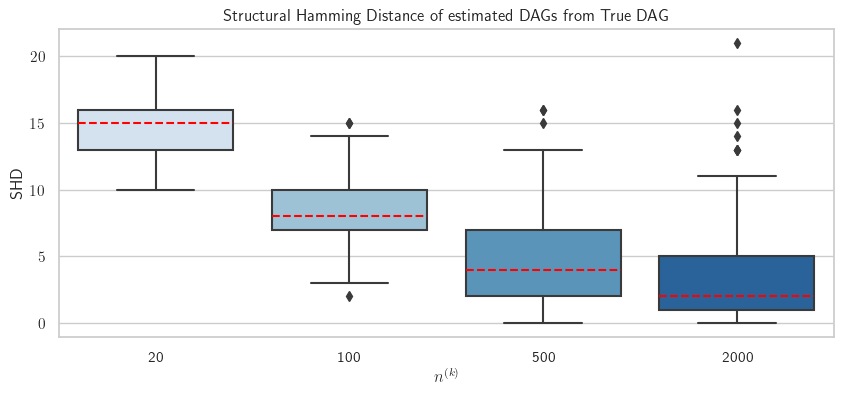

In [35]:
fig, ax = plt.subplots(figsize=(10, 4))  

sns.set(style="whitegrid")
palette = sns.color_palette("rocket")
medianprops = {'color': 'red', 'linestyle': '--'}
sns.boxplot(data=pd.DataFrame(tot_shd_results), orient="v", palette="Blues", ax=ax, medianprops=medianprops)

# Add customizations
plt.title("Structural Hamming Distance of estimated DAGs from True DAG")
plt.ylabel("SHD")
plt.rcParams['text.usetex'] = True
plt.xlabel(r'$n^{(k)}$')

# Display the plot
plt.savefig('output/simulation/shd_boxplots.png')
plt.show()

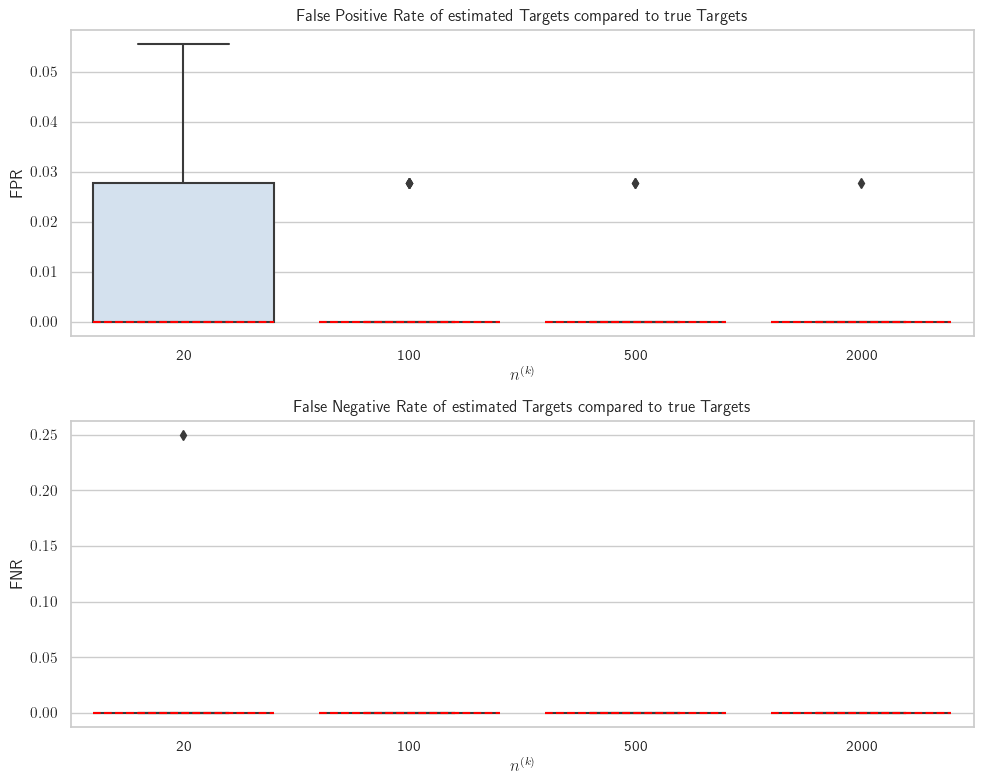

In [34]:
# Create a 2x1 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot 1 - Box plot
sns.set(style="whitegrid")
plt.rcParams['text.usetex'] = True
palette = sns.color_palette("rocket")
medianprops = {'color': 'red', 'linestyle': '--'}
sns.boxplot(data=pd.DataFrame(tot_fpr_results), orient="v", palette="Blues", ax=axes[0], medianprops=medianprops)

# Add customizations to the first plot
axes[0].set_title("False Positive Rate of estimated Targets compared to true Targets")
axes[0].set_ylabel("FPR")
axes[0].set_xlabel(r'$n^{(k)}$')

# Plot 2 - Another Box plot (you can customize this plot separately)
sns.boxplot(data=pd.DataFrame(tot_fnr_results), orient="v", palette="Blues", ax=axes[1], medianprops=medianprops)

# Add customizations to the second plot
axes[1].set_title("False Negative Rate of estimated Targets compared to true Targets")
axes[1].set_ylabel("FNR")
axes[1].set_xlabel(r'$n^{(k)}$')

# Adjust layout
plt.tight_layout()

# Display the combined plot
plt.savefig('output/simulation/fpr_fnr_boxplots.png')
plt.show()
